<a href="https://colab.research.google.com/github/binhvd/Data-Management-2-Labs/blob/main/7%20-%20PySpark/NYC_Parking_Tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [ ]:
!pip install pyspark

from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download files from Google Cloud Storage

In [ ]:
!wget https://storage.googleapis.com/adsa-data/new-york/Parking_Violations_Issued_-_Fiscal_Year_2015.csv
!wget https://storage.googleapis.com/adsa-data/new-york/Parking_Violations_Issued_-_Fiscal_Year_2016.csv
!wget https://storage.googleapis.com/adsa-data/new-york/Parking_Violations_Issued_-_Fiscal_Year_2017.csv

--2023-05-02 14:53:59--  https://storage.googleapis.com/srh-dataset/new-york/Parking_Violations_Issued_-_Fiscal_Year_2015.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 812797952 (775M) [text/csv]
Saving to: ‘Parking_Violations_Issued_-_Fiscal_Year_2015.csv’

Parking_Violations_ 100%[===================>] 775.14M  33.8MB/s    in 23s     

2023-05-02 14:54:22 (33.8 MB/s) - ‘Parking_Violations_Issued_-_Fiscal_Year_2015.csv’ saved [812797952/812797952]



## Try to import records to DataFrames

In [ ]:
import glob
import pandas as pd   
import time

data = []
start_time = time.time()

for path in glob.glob("/content/*.csv"):
  df = pd.read_csv(path)
  data.append(df)

df = pd.concat(data)
print("--- %s seconds ---" % (time.time() - start_time))

## Connect to Cluster

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("yarn")\
        .appName('NYC-Parking-Tickets')\
        .getOrCreate()

## Read CSV files to DataFrame


In [ ]:
data = spark.read.csv(
    'gs://adsa-data/new-york/*.csv',
    sep = ',',
    header = True,
)

data.printSchema()

root
 |-- Summons Number: string (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Issuing Agency: string (nullable = true)
 |-- Street Code1: string (nullable = true)
 |-- Street Code2: string (nullable = true)
 |-- Street Code3: string (nullable = true)
 |-- Vehicle Expiration Date: string (nullable = true)
 |-- Violation Location: string (nullable = true)
 |-- Violation Precinct: string (nullable = true)
 |-- Issuer Precinct: string (nullable = true)
 |-- Issuer Code: string (nullable = true)
 |-- Issuer Command: string (nullable = true)
 |-- Issuer Squad: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Time First Observed: string (nullable = true)
 |-- Violation County: str

## Inspect the data

In [ ]:
# Display 5 entries


+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-----------+-------------------+--------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+--------+---------+---------------+------------------+------------+----+----+----+----------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street C

In [ ]:
# Count records


3281458

In [ ]:
# count distinct records


3058914

In [ ]:
# Convert Issue Date from String to Date Type and save the converted values to the new column Issue_Date


data.printSchema()

root
 |-- Summons Number: string (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Issuing Agency: string (nullable = true)
 |-- Street Code1: string (nullable = true)
 |-- Street Code2: string (nullable = true)
 |-- Street Code3: string (nullable = true)
 |-- Vehicle Expiration Date: string (nullable = true)
 |-- Violation Location: string (nullable = true)
 |-- Violation Precinct: string (nullable = true)
 |-- Issuer Precinct: string (nullable = true)
 |-- Issuer Code: string (nullable = true)
 |-- Issuer Command: string (nullable = true)
 |-- Issuer Squad: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Time First Observed: string (nullable = true)
 |-- Violation County: str

## Dealing with Missing Values

In [ ]:
# Drop duplications


data.count()

3058914

In [ ]:
# Count NOT-NULL entries for each column


+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-----------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+--------+---------+---------------+------------------+------------+---+---+---+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle Ex

In [ ]:
# Drop columns that have no values


data.show(5)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-----------+-------------------+--------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+----------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle Expiration Date|Violation Location|Violation Precinct|Issuer Precinct|Issuer Code|Issuer Command|Issuer Squad|Violation Time|Time First Observed|V

## Querying Data

In [ ]:
# Count the number of tickets issued by each state and store to new_df


new_df.show()

+------------------+------+
|Registration State| count|
+------------------+------+
|                AZ|  7560|
|                SC|  6056|
|                NS|   265|
|                LA|  1015|
|                MN|  5644|
|                NJ|300999|
|                DC|  1318|
|                OR|  1657|
|                99|  9248|
|                VA| 20629|
|                RI|  4346|
|                KY|  1265|
|                WY|   103|
|                BC|    84|
|                NH|  2927|
|                MI|  5634|
|                NV|   737|
|                GV|   189|
|                QB|  1947|
|                WI|  1549|
+------------------+------+
only showing top 20 rows



In [ ]:
import time

start_time = time.time()

# Count which cars get the most tickets


print("--- %s seconds ---" % (time.time() - start_time))

+------------+------+
|Vehicle Make| count|
+------------+------+
|        FORD|442011|
|       TOYOT|318308|
|       HONDA|295029|
|       CHEVR|262115|
|       NISSA|237174|
|       FRUEH|130966|
|       INTER|114161|
|       DODGE|112212|
|       ME/BE|106056|
|         BMW|103312|
|         GMC|101630|
|        JEEP| 81846|
|       HYUND| 70557|
|       LEXUS| 65519|
|       ACURA| 58112|
|       VOLKS| 57512|
|       CHRYS| 57019|
|       NS/OT| 52257|
|       INFIN| 44012|
|       ISUZU| 43888|
+------------+------+
only showing top 20 rows

--- 14.418765783309937 seconds ---


## SQL Queries

In [ ]:
# Create a temporary view


In [ ]:
# Get all the tickets issued before 2014


+--------------+----------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+---------------+-------------------+--------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+--------+---------+---------------+------------------+------------+----+----+----+----------+
|Summons Number|  Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|

## Data Visualization

<Axes: xlabel='Registration State'>

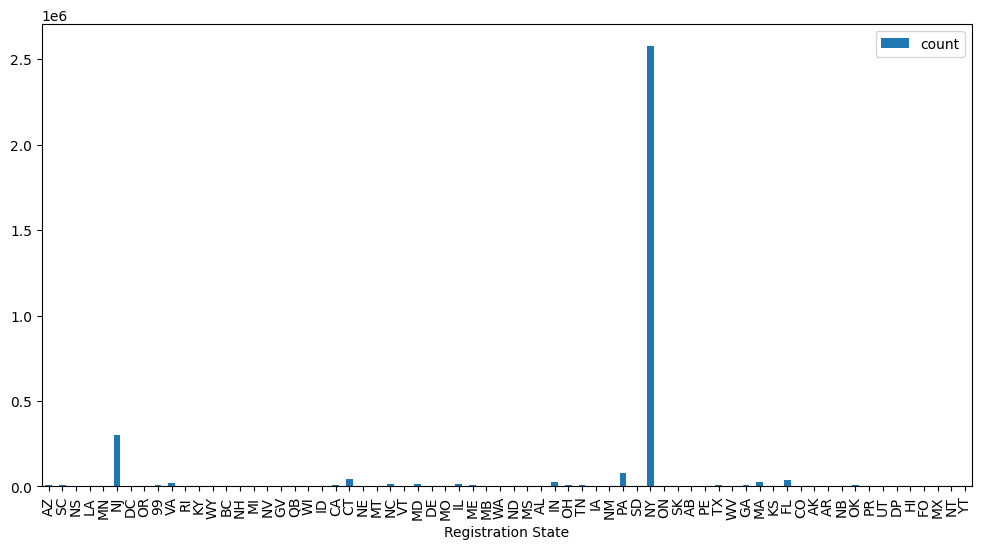

In [ ]:
# Visualize the number of tickets issued by each state from new_df
